In [4]:
import os
from pathlib import Path
TUTORIAL_DIR = Path(os.getcwd()).as_posix()

# Building Sensitivity Analisys


The aim of this tutorial is to provide a complete workflow for building thermal simulation sensitivity analysis using
[__EnergyPlus__](https://energyplus.net) and __energytoot__

## Introduction

Sensitivity Analysis methods are mathematical method that quantify the impact of and uncertain parameters on a specific metrics.
Various methods exists such as Morris or Sobol.

During building conception workflow, sensitivity analysis can have various benefits:
- Screen out a number of irrelevant conception variables to focus on the important ones (does the solar absorption of the partition glass-wool have a relevant impact on building heat needs ?)
- Sort  relevant uncertain parameter by influence on the observed metrics.
- Help you quantify the relative importance of the modeled physical phenomenons

In this example, the use case is an old building retrofitting. The objective is to insulate the south facade using double skin.
The designer wants to know the impact of the following variables on the building **heat needs** and on the **thermal comfort**:
- Double skin glazing thermal properties : Solar Heat Gain Coefficient (SHGC), thermal conductivity coefficient ($U_{value}$)
- Envelope glazing thermal properties : Solar Heat Gain Coefficient (SHGC), thermal conductivity coefficient ($U_{value}$)
- Envelope insulation thickness
- Air infiltration soefficient Q4Pa [m^3/h.m² @4Pa]

To answer these questions we will use an EnergyPlus building model and energytool class to perform Morris & Sobol sensitivity analisys

## Building modeling

In energytool, the <code>Building</code> class is used to simulate HVAC systems through pre-process and post process methods.
The <code>Building</code> holds and idf file. The user specify hvac system using the <code>system</code> module.

In [2]:
from energytool.building import Building

The path of the idd file of EnergyPlus must be given to the <code>Building</code> class.
Be careful idf file E+ version and idd file version must match

In [3]:
Building.set_idd(Path(r'C:\EnergyPlusV9-4-0'))

Now we instantiate a building with an idf file representing the building thermal model.
The idf can be generated manually or using a software (Openstudio, DesignBuilder).
Keep in mind that the main advantage of the energytool <code>Building</code> class, is to simplify hvac system modeling using pre-process and post-process methods.
Thus, we recommend using <code>IdealLoadAirSystem</code> to model HVAC and Domestic Hot Water production (DHW).

In [9]:
building = Building(idf_path=Path(TUTORIAL_DIR) / "resources/tuto_as.idf")

The <code>infos()</code> method display information on the building object

In [11]:
building.infos()

==Building==

Number of occupants : 80.21
Building surface : 750.0895999999999 m²
Building volume : 2299.8318 m3
Zone number : 5

==HVAC systems==

Heating systems : []
Cooling systems : []
Ventilation system : []
Artificial lighting system : []
DHW production : []
PV production : []
Others : []


Now it is time to specify the building hvac equipments.
We will use the one present in the <code>system</code> module.
Note that you can use custom class as long as they contain a <code>pre_process()</code> and a <code>post_process()</code> methods

In this example, we will only use a boiler with a cop of 1 as we want to work with building heating needs.
For more information on building system, see the dedicated tutorial.

In [17]:
import energytool.system as st

In [18]:
building.heating_system["Main_heater"] = st.HeaterSimple(
    name="IdealBoiler",
    building=building,
    zones='*',
    cop=1
)

In [19]:
from energytool.simulate import Simulation
from energytool.simulate import SimulationsRunner

In [32]:
TUTORIAL_DIR

'C:/Users/bdurandestebe/PycharmProjects/energytool/tutorials'

In [33]:
simu_list = [Simulation(
    building=building,
    epw_file_path=Path(TUTORIAL_DIR) / r"resources/FRA_Bordeaux.075100_IWEC.epw")]

In [34]:
runner = SimulationsRunner(simu_list, run_dir=Path(r'C:\Users\bdurandestebe\Desktop\idf\run_dev'))

In [35]:
runner.run()

<AxesSubplot:xlabel='Date/Time'>

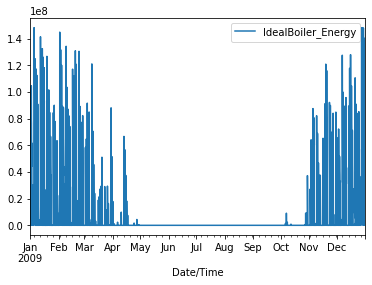

In [37]:
runner.simu_list[0].building.building_results.plot()